## <center>Part 1. Visualization: from Simple Distributions to Dimensionality Reduction

### Article outline

1. [Dataset](#1.-Dataset)
2. [Univariate visualization](#2.-Univariate-visualization)
    * 2.1 [Quantitative features](#2.1-Quantitative-features)
    * 2.2 [Categorical and binary features](#2.2-Categorical-and-binary-features)
3. [Multivariate visualization](#3.-Multivariate-visualization)
    * 3.1 [Quantitative vs. Quantitative](#3.1-Quantitative-vs.-Quantitative)
    * 3.2 [Quantitative vs. Categorical](#3.2-Quantitative-vs.-Categorical)
    * 3.3 [Categorical vs. Categorical](#3.3-Categorical-vs.-Categorical)
4. [Whole dataset visualizations](#4.-Whole-dataset-visualizations)
    * 4.1 [Naive approach](#4.1-A-naive-approach)
    * 4.2 [Dimensionality reduction](#4.2-Dimensionality-reduction)
    * 4.3 [t-SNE](#4.3-t-SNE)
5. [Demo assignment](#6.-Demo-assignment)
6. [Useful resources](#6.-Useful-resources)

## 1. Dataset

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
df = pd.read_csv("telecom_churn.csv")

In [3]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a *target*.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## 2. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

#### 2.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

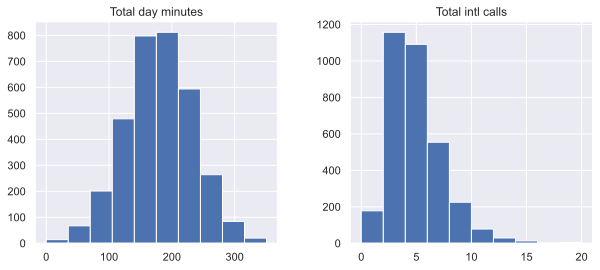

In [9]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4));

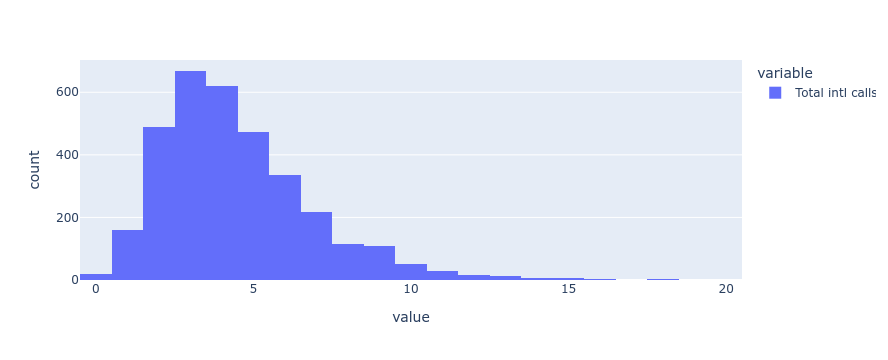

In [7]:
import plotly.express as px
fig = px.histogram(df["Total intl calls"], x=["Total intl calls"])
fig.show()

[smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram

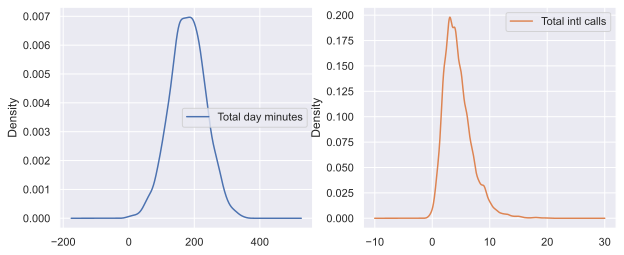

In [18]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

/tmp/ipykernel_20656/1312672809.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Total day minutes', ylabel='Density'>

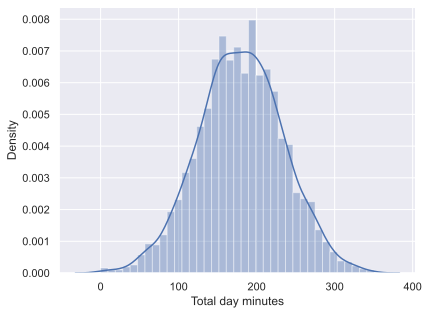

In [19]:
sns.distplot(df[features[0]])

<Axes: xlabel='Total day minutes', ylabel='Density'>

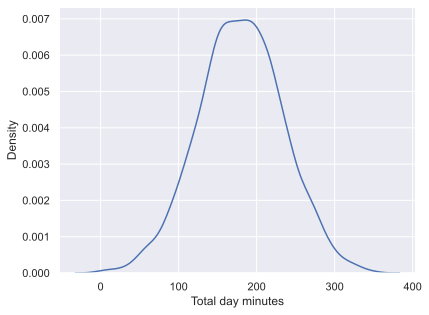

In [20]:
sns.kdeplot(df, x=features[0])

<Axes: xlabel='Total intl calls', ylabel='Density'>

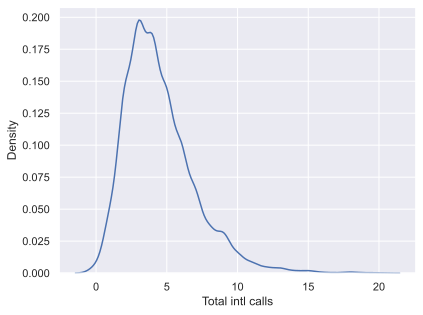

In [21]:
sns.kdeplot(df, x=features[1])

<Axes: xlabel='Total day minutes', ylabel='Total intl calls'>

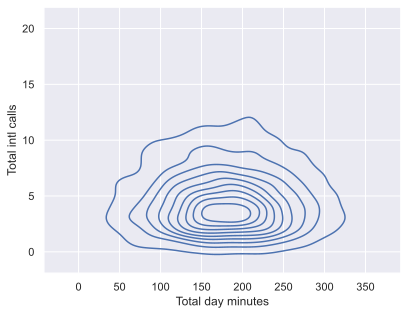

In [22]:
sns.kdeplot(df, x=features[0], y=features[1])

In [50]:
example = np.random.normal(size=1000)# list(range(101))

<Axes: ylabel='Density'>

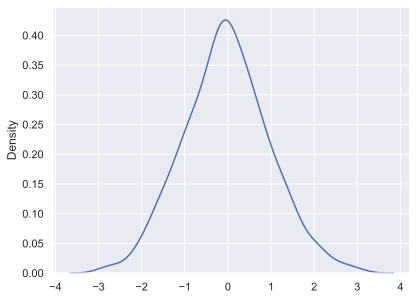

In [57]:
sns.kdeplot(example)

<Axes: >

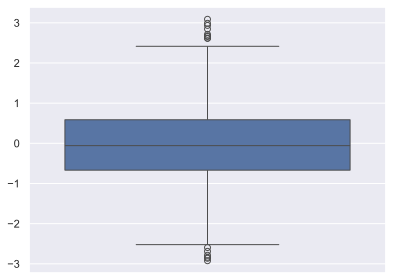

In [58]:
sns.boxplot(example)

In [52]:
len(example)

1000

In [53]:
np.median(list(example))

np.float64(-0.05680454808846498)

In [54]:
np.quantile(list(example), 0.25)

np.float64(-0.6674945550987033)

In [55]:
np.quantile(list(example), 0.75)

np.float64(0.586569025638347)

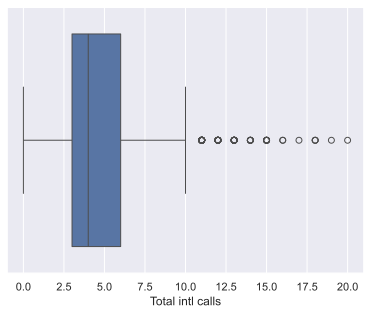

In [56]:
sns.boxplot(x="Total intl calls", data=df);


The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

##### Violin plot

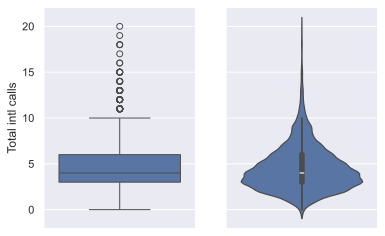

In [59]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1]);

In [60]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

#### 2.2 Categorical and binary features


##### Frequency table

[`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method:

In [61]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

##### Bar plot

In [ ]:
ab.set_xticks()

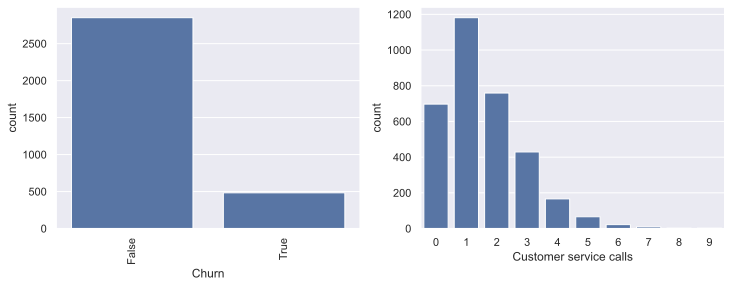

In [75]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
axes[0].set_xticks(ticks=[0, 1], labels=[False, True], rotation=90)
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

## 3. Multivariate visualization

#### 3.1 Quantitative vs. Quantitative

##### Correlation matrix

In [79]:
N = 1000
X1 = np.random.randint(1, 11, N)
X2 = np.random.randn(N)
tdf = pd.DataFrame([X1, X2/X1]).T
tdf.columns = ['X1', 'X2']

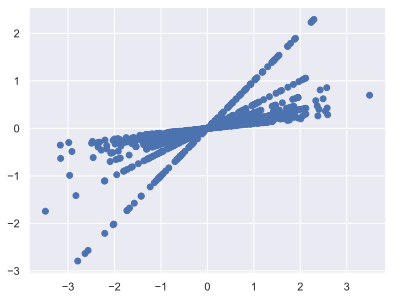

In [80]:
plt.scatter(X2, X2/X1)

In [81]:
tdf.corr()

X1        X2
X1  1.000000  0.020195
X2  0.020195  1.000000

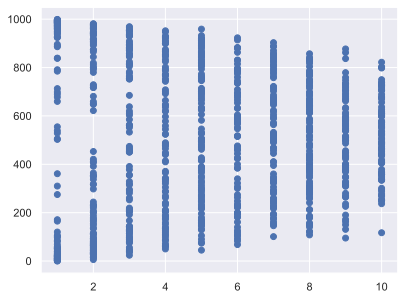

In [82]:
plt.scatter(tdf.sort_values('X2')['X1'], range(len(tdf)))

In [83]:
N = 1000
X1 = np.random.randn(N)
X2 = np.random.normal(scale=0.5, size=N)
tdf = pd.DataFrame([X1, X2+X1]).T
tdf.columns = ['X1', 'X2']

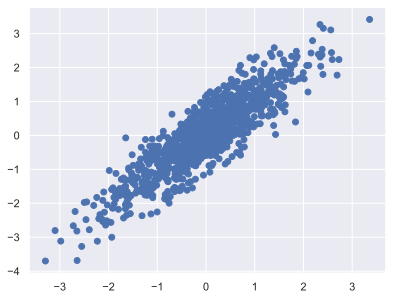

In [84]:
plt.scatter(tdf['X1'], tdf['X2'])

In [85]:
tdf.corr()

X1        X2
X1  1.000000  0.885233
X2  0.885233  1.000000

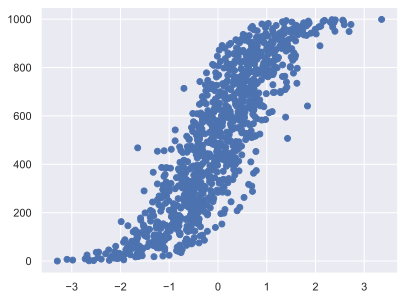

In [86]:
plt.scatter(tdf.sort_values('X2')['X1'], range(len(tdf)))

In [87]:
tdf['X1'] *= -1
tdf.corr()

X1        X2
X1  1.000000 -0.885233
X2 -0.885233  1.000000

In [88]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - set(
        [
            "State",
            "International plan",
            "Voice mail plan",
            "Area code",
            "Churn",
            "Customer service calls",
        ]
    )
)

# Calculate and plot
corr_matrix = df[numerical].corr()

In [89]:
corr_matrix

Total eve calls  Total day calls  Total intl calls  \
Total eve calls               1.000000         0.006462          0.017434   
Total day calls               0.006462         1.000000          0.004574   
Total intl calls              0.017434         0.004574          1.000000   
Number vmail messages        -0.005864        -0.009548          0.013957   
Total day minutes             0.015769         0.006750          0.008033   
Total night minutes          -0.002093         0.022938         -0.012353   
Total day charge              0.015769         0.006753          0.008032   
Total intl charge             0.008674         0.021666          0.032372   
Total intl minutes            0.008703         0.021565          0.032304   
Total night calls             0.007710        -0.019557          0.000305   
Total eve minutes            -0.011430        -0.021451          0.002541   
Account length                0.019260         0.038470          0.020661   
Total night charge           -0.002056         0.022927         -0.012329   
Total eve charge             -0.011423        -0.021449          0.002541   

                       Number vmail messages  Total day minutes  \
Total eve calls                    -0.005864           0.015769   
Total day calls                    -0.009548           0.006750   
Total intl calls                    0.013957           0.008033   
Number vmail messages               1.000000           0.000778   
Total day minutes                   0.000778           1.000000   
Total night minutes                 0.007681           0.004323   
Total day charge                    0.000776           1.000000   
Total intl charge                   0.002884          -0.010092   
Total intl minutes                  0.002856          -0.010155   
Total night calls                   0.007123           0.022972   
Total eve minutes                   0.017562           0.007043   
Account length                     -0.004628           0.006216   
Total night charge                  0.007663           0.004300   
Total eve charge                    0.017578           0.007029   

                       Total night minutes  Total day charge  \
Total eve calls                  -0.002093          0.015769   
Total day calls                   0.022938          0.006753   
Total intl calls                 -0.012353          0.008032   
Number vmail messages             0.007681          0.000776   
Total day minutes                 0.004323          1.000000   
Total night minutes               1.000000          0.004324   
Total day charge                  0.004324          1.000000   
Total intl charge                -0.015180         -0.010094   
Total intl minutes               -0.015207         -0.010157   
Total night calls                 0.011204          0.022972   
Total eve minutes                -0.012584          0.007050   
Account length                   -0.008955          0.006214   
Total night charge                0.999999          0.004301   
Total eve charge                 -0.012592          0.007036   

                       Total intl charge  Total intl minutes  \
Total eve calls                 0.008674            0.008703   
Total day calls                 0.021666            0.021565   
Total intl calls                0.032372            0.032304   
Number vmail messages           0.002884            0.002856   
Total day minutes              -0.010092           -0.010155   
Total night minutes            -0.015180           -0.015207   
Total day charge               -0.010094           -0.010157   
Total intl charge               1.000000            0.999993   
Total intl minutes              0.999993            1.000000   
Total night calls              -0.013630           -0.013605   
Total eve minutes              -0.011067           -0.011035   
Account length                  0.009546            0.009514   
Total night charge             -0.015186           -0.015214   
Tota

<Axes: >

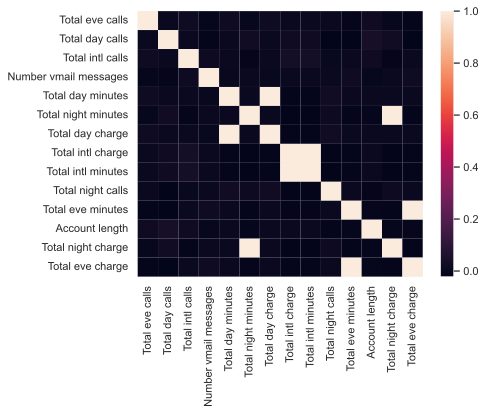

In [92]:
sns.heatmap(corr_matrix)#, annot=True, fmt='.1f');

In [94]:
numerical = list(
    set(numerical)
    - set(
        [
            "Total day charge",
            "Total eve charge",
            "Total night charge",
            "Total intl charge",
        ]
    )
)

##### Scatter plot


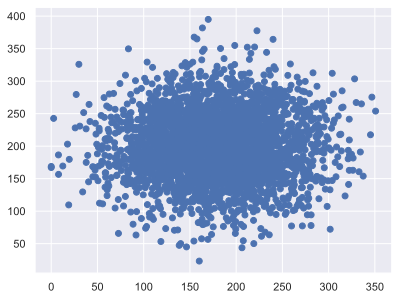

In [95]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

In [96]:
df.shape

(3333, 20)

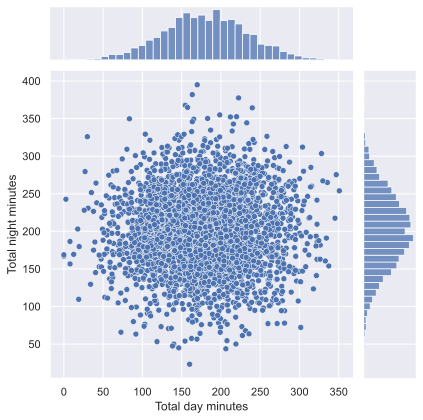

In [97]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

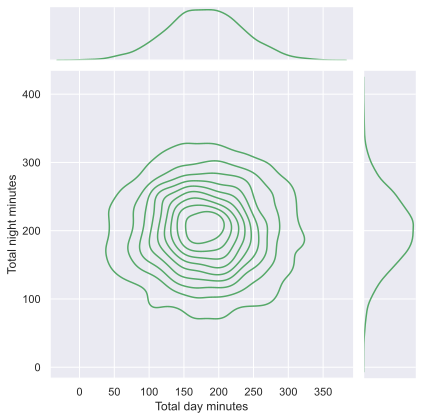

In [98]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="kde", color="g");

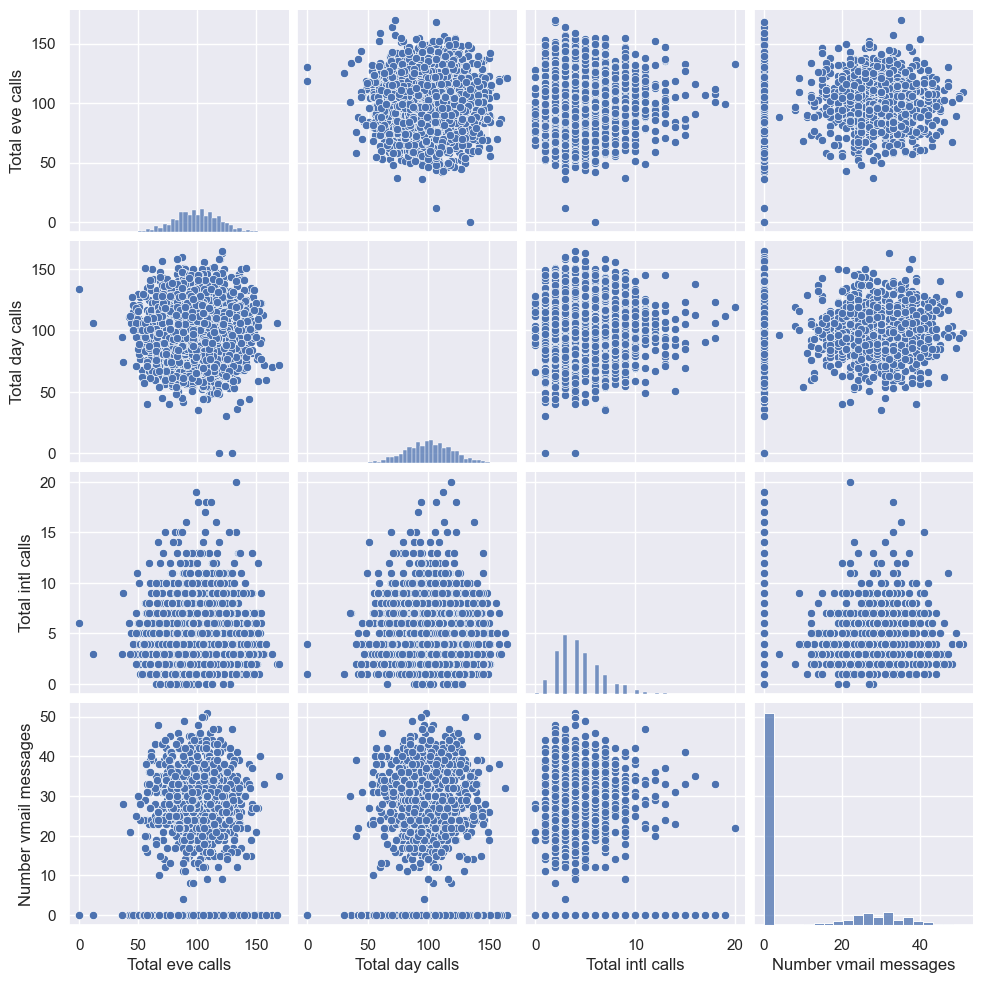

In [99]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical[:4]]);

In [100]:
%config InlineBackend.figure_format = 'svg'


#### 3.2 Quantitative vs. Categorical

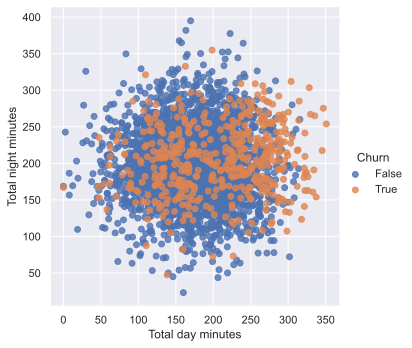

In [101]:
sns.lmplot(x="Total day minutes", y="Total night minutes", data=df, hue="Churn", fit_reg=False);

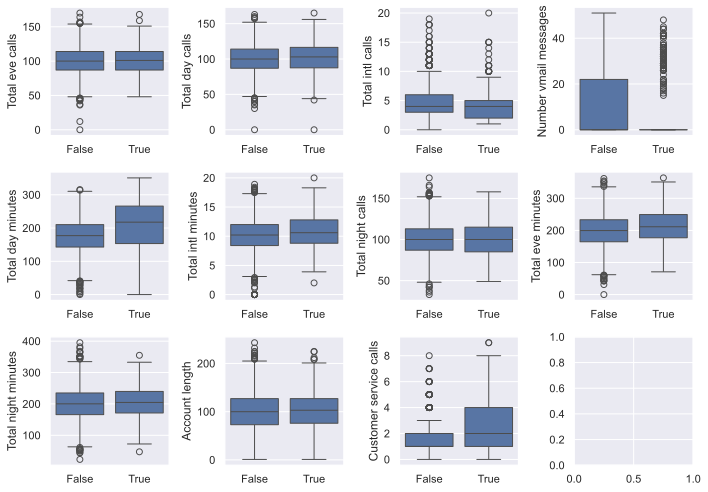

In [102]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

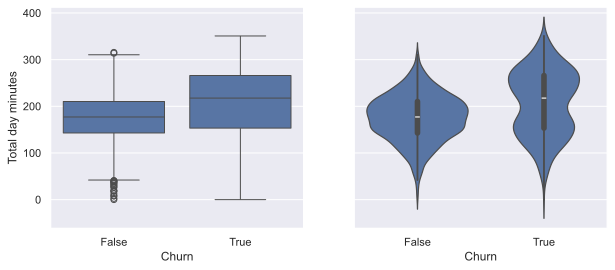

In [103]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

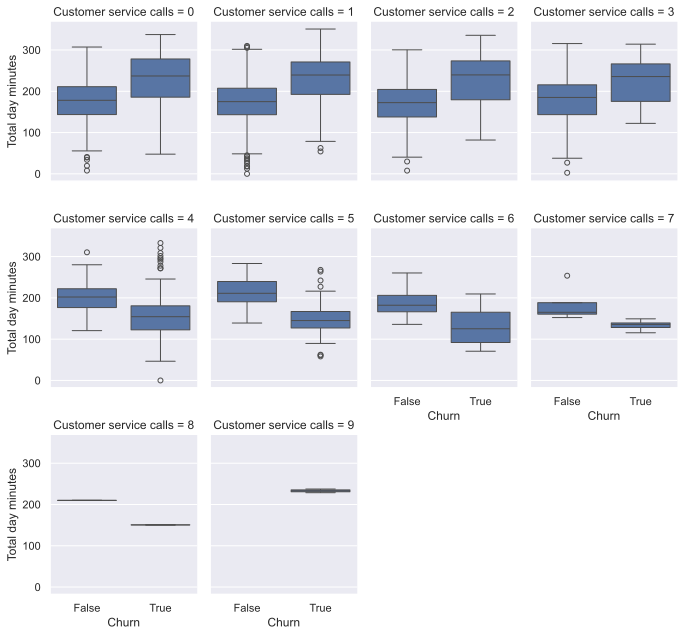

In [105]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df,#[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);

In [113]:
temp_df = pd.DataFrame(np.array([[0, 0], [1, 1], [1, 0], [0, 1]]))

In [114]:
temp_df.columns = ['X1', 'X2']
temp_df['Y'] = [0, 0, 1, 1]

In [115]:
new_df = pd.concat([temp_df]*100)

In [116]:
rdf = new_df.copy()

In [117]:
rdf['X1'] = (new_df['X1'] * 2 - 1) + np.random.normal(scale=0.3, size=400)

In [118]:
rdf['X2'] = (new_df['X2'] * 2 - 1) + np.random.normal(scale=0.3, size=400)

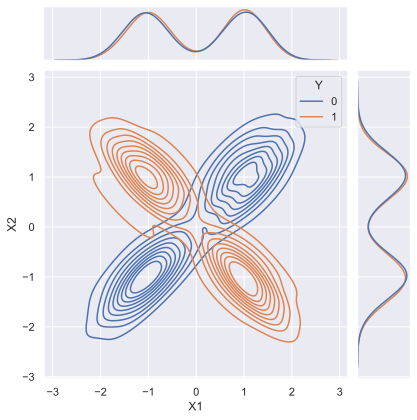

In [112]:
sns.jointplot(rdf, x="X1", y="X2", hue="Y", kind="kde")

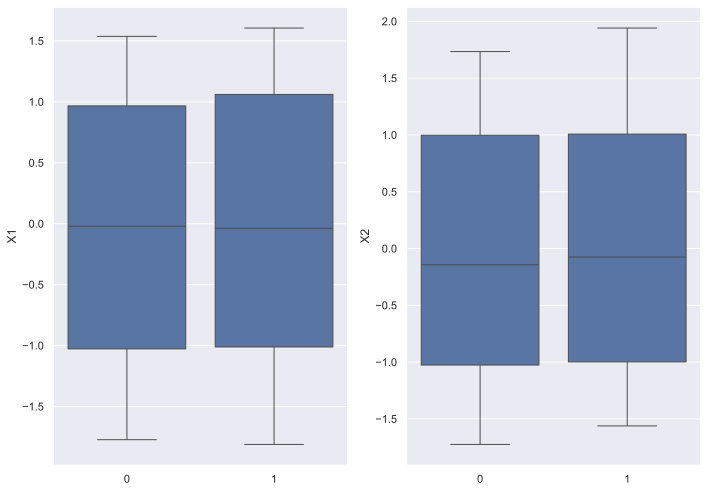

In [119]:
result_df = rdf

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))
for idx, feat in enumerate(['X1', 'X2']):
    ax = axes[idx]
    sns.boxplot(x="Y", y=feat, data=result_df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

#### 3.3 Categorical vs. Categorical

<Axes: xlabel='Customer service calls', ylabel='count'>

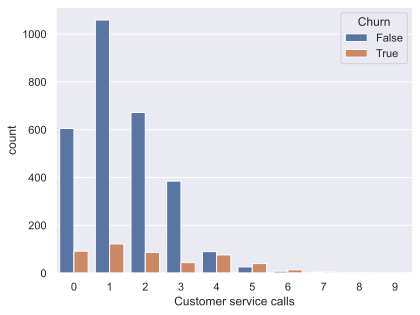

In [120]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

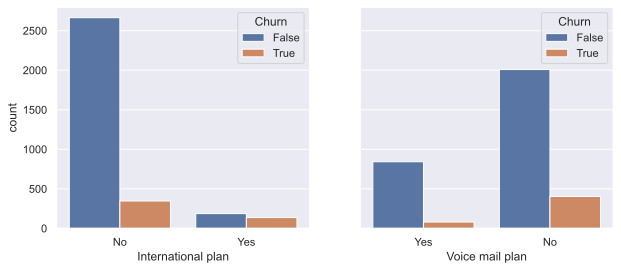

In [121]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);

**An observation**: when *International Plan* is enabled, the churn rate is much higher; the usage of the international plan by the customer is a strong feature. We do not observe the same effect with *Voice mail plan*.

##### Contingency table

In addition to using graphical means for categorical analysis, there is a traditional tool from statistics: a *contingency table*, also called a *cross tabulation*. It shows a multivariate frequency distribution of categorical variables in tabular form. In particular, it allows us to see the distribution of one variable conditional on the other by looking along a column or row.

Let's try to see how *Churn* is related to the categorical variable *State* by creating a cross tabulation:

In [122]:
pd.crosstab(df["State"], df["Churn"]).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

In [123]:
df.groupby(["State"])["Churn"].agg([np.mean, 'count']).sort_values(by="mean", ascending=False).T

/tmp/ipykernel_20656/1263115733.py:1: FutureWarning:

The provided callable <function mean at 0x77cdb8087380> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



State         CA         NJ     TX         MD         SC         MI  \
mean    0.264706   0.264706   0.25   0.242857   0.233333   0.219178   
count  34.000000  68.000000  72.00  70.000000  60.000000  73.000000   

State         MS         WA         NV         ME  ...         RI         WI  \
mean    0.215385   0.212121   0.212121   0.209677  ...   0.092308   0.089744   
count  65.000000  66.000000  66.000000  62.000000  ...  65.000000  78.000000   

State         IL         NE         LA         IA         VA       AZ  \
mean    0.086207   0.081967   0.078431   0.068182   0.064935   0.0625   
count  58.000000  61.000000  51.000000  44.000000  77.000000  64.0000   

State         AK         HI  
mean    0.057692   0.056604  
count  52.000000  53.000000  

[2 rows x 51 columns]

## 4. Whole dataset visualizations

#### 4.1 A naive approach

#### 4.2 Dimensionality reduction

#### 4.3 t-SNE

In [124]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [125]:
X = df.drop(["Churn", "State"], axis=1)
X["International plan"] = X["International plan"].map({"Yes": 1, "No": 0})
X["Voice mail plan"] = X["Voice mail plan"].map({"Yes": 1, "No": 0})

In [126]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now, let's build a t-SNE representation:

In [127]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 10.3 s, sys: 24.5 ms, total: 10.3 s
Wall time: 9.76 s


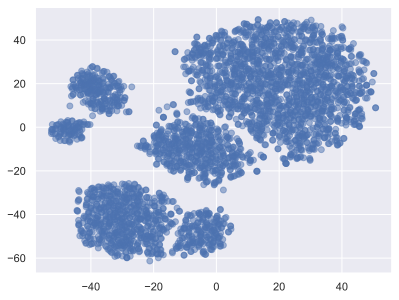

In [128]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=0.5);

In [ ]:
representationplt.scatter(
    tsne_repr[:, 0],
    tsne_repr[:, 1],
    c=df["Churn"].map({False: "blue", True: "orange"}),
    alpha=0.5,
);

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(["International plan", "Voice mail plan"]):
    axes[i].scatter(
        tsne_repr[:, 0],
        tsne_repr[:, 1],
        c=df[name].map({"Yes": "orange", "No": "blue"}),
        alpha=0.5,
    )
    axes[i].set_title(name);